In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('/kaggle/input/dataset/Income Survey Dataset.csv')
df.head()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Work_yearly,Emp_week_ref,Total_hour_ref,paid_emp_ref,self_emp_ref,Immigrant,Year_immigrant,income_after_tax,Cap_gain,Childcare_expe,Child_benefit,CPP_QPP,Earning,Guaranteed_income,Investment,Old_age_pension,Private_pension,Self_emp_income,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,30,96,9996,6,6,2,6,20275,0,0,0,5000,0,7750,0,7000,0,0,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,11,52,2080,1,2,2,6,61680,0,0,0,0,70000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,11,52,2080,1,2,2,6,26875,0,0,4500,0,22000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,11,52,2080,1,2,2,6,14000,0,0,0,0,14000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,96,96,9996,6,6,6,6,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,0,0,110875,0,106000,0,4,4,99999996,99999996


What is the average salary for each gender ?

In [ ]:
grouped_df = df[['Gender','Total_income', 'Salary_wages']]
grouped_df = grouped_df.groupby('Gender').mean()
new_df = grouped_df.reset_index()
sns.barplot(data = new_df, x = 'Gender', y = 'Total_income')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.title('Difference in salary by gender  (1 : Men , 2: Women)');

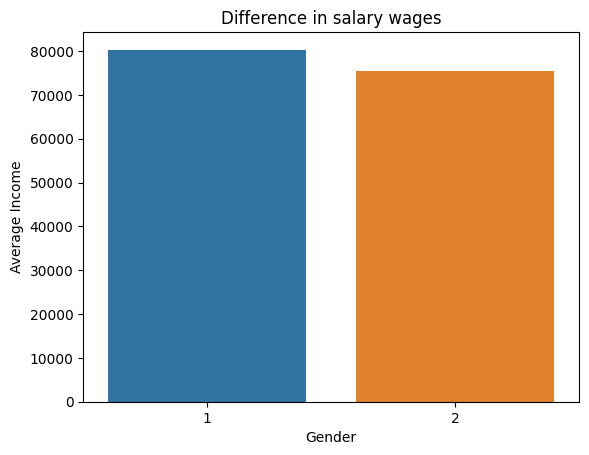

In [41]:

sns.barplot(data = new_df, x = 'Gender', y = 'Salary_wages')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.title('Difference in salary wages');

	1.	What is the average income overall?

In [7]:
df.head()
average = df[['Total_income', 'Salary_wages']].mean()
average

Total_income    111195.605220
Salary_wages     77770.533637
dtype: float64

	2.	What is the income distribution (e.g., histogram, percentiles)?

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


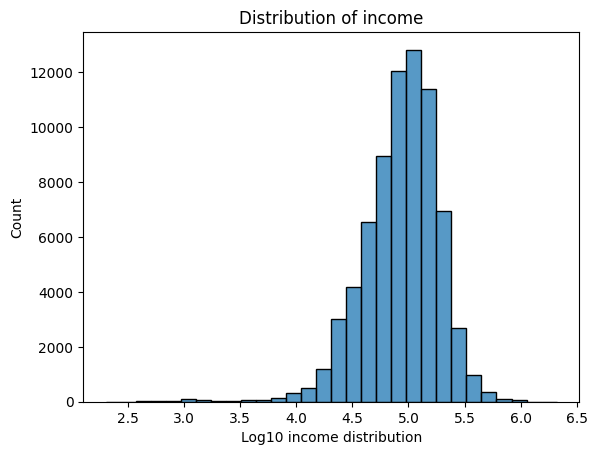

In [18]:

df['Log10 income'] = np.log10(df['Total_income'])
sns.histplot(data = df, x = 'Log10 income', bins = 30)
plt.xlabel('Log10 income distribution')
plt.ylabel('Count')
plt.title('Distribution of income');

    How does income vary by education level or degree?

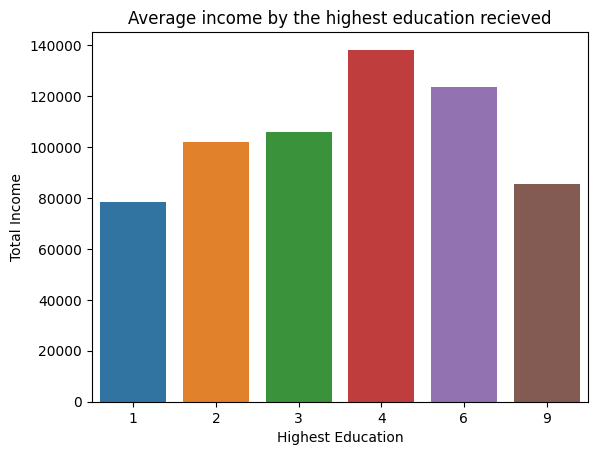

In [35]:
df.head()

educational_level = df[['Total_income', 'Highest_edu']].groupby('Highest_edu').mean().reset_index()
sns.barplot(data = educational_level, x = 'Highest_edu', y = 'Total_income')
plt.xlabel('Highest Education')
plt.ylabel('Total Income')
plt.title('Average income by the highest education recieved');


    Which province has the highest/lowest income?

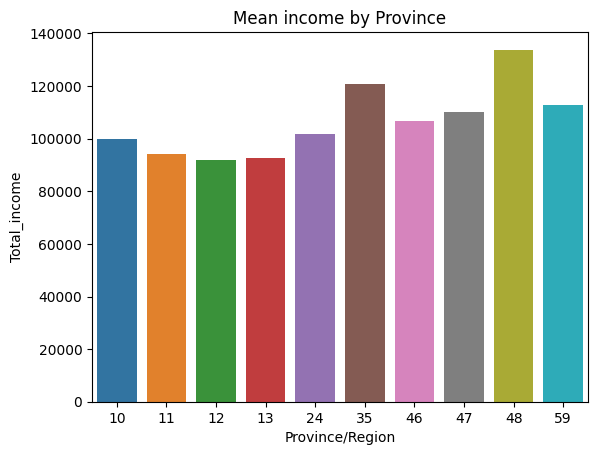

In [48]:
df.head()
province = df[['Province','Total_income']].groupby('Province').mean().reset_index()
sns.barplot(data = province, x = 'Province', y = 'Total_income')
plt.xlabel('Province/Region')
plt.ylabel('Total_income')
plt.title('Mean income by Province');

    How does income change with age or years of experience?

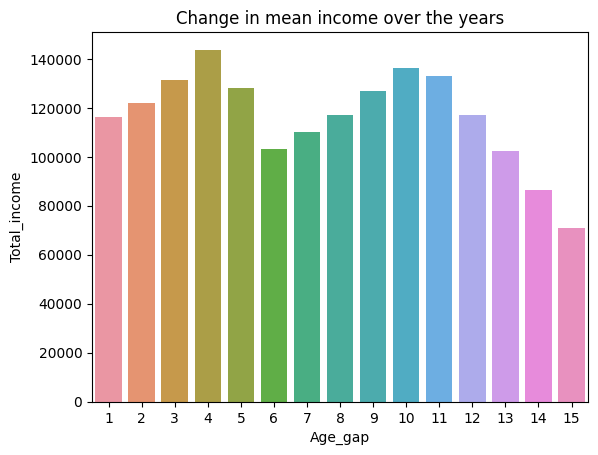

In [52]:

age_df = df[['Age_gap','Total_income']].groupby('Age_gap').mean().reset_index()
sns.barplot(data = age_df, x = 'Age_gap', y = 'Total_income')
plt.xlabel('Age_gap')
plt.ylabel('Total_income')
plt.title('Change in mean income over the years');

    The average investment income
    

In [63]:
df.head()
invalid_values = [99999996,0,-4750,-72500,-16000,-7750,-975,-1500,-1075,-925]
df = df[~df['Investment'].isin(invalid_values)]
print(df['Investment'].mean())

8774.474811603179


    	How many people fall into each marital status or province?

In [70]:
df.head()
print(df['Marital_status'].value_counts())
print(df['Province'].value_counts())

Marital_status
1     11442
3      3087
4      2521
2      1804
99      520
Name: count, dtype: int64
Province
35    5821
24    3312
59    2723
48    2074
46    1615
47    1500
12     800
13     703
11     432
10     394
Name: count, dtype: int64


    Compare income sources between immigrants and non-immigrants


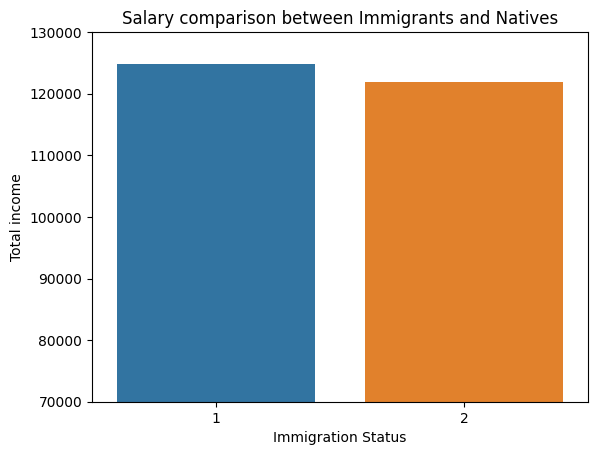

In [89]:
df.head()
invalid = [9]
df['Total_income'].value_counts()
df = df[~df['Immigrant'].isin(invalid)]
Income = df[['Immigrant', 'Total_income']].groupby('Immigrant').mean().reset_index()
sns.barplot(data = Income, x = 'Immigrant', y = 'Total_income')
plt.xlabel('Immigration Status')
plt.ylabel('Total income')
plt.ylim(70000,130000)
plt.title('Salary comparison between Immigrants and Natives');


  Correlation between work hours and income

In [105]:
clean_df = df[['Total_hour_ref', 'Total_income']].copy()
clean_df = clean_df.dropna()
df_clean = clean_df[(clean_df['Total_hour_ref'] > 0) & (clean_df['Total_income'] > 0)]
invalid2 = [9996]
df_clean = df_clean[~df_clean['Total_hour_ref'].isin(invalid2)]
df_clean['Total_hour_ref'].value_counts()
correlation = df_clean['Total_hour_ref'].corr(df_clean['Total_income'])
print(f'Correlation between hours worked and income: {correlation:.2f}')
print(f'Showing a relatively very positive correlation')

Correlation between hours worked and income: 0.14
Showing a relatively very positive correlation


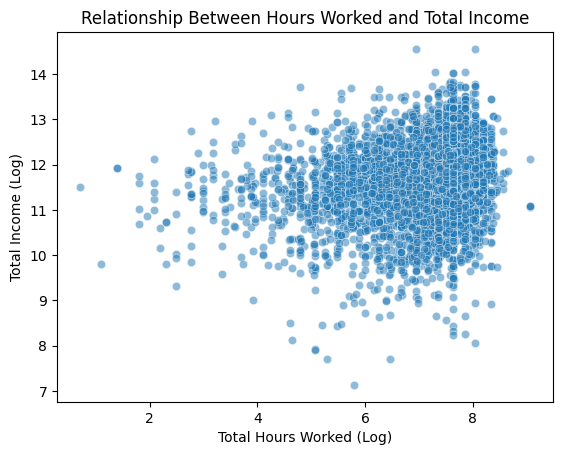

In [109]:
df_clean['Log_total_hours'] = np.log(df_clean['Total_hour_ref'])
df_clean['Log_income'] = np.log(df_clean['Total_income'])

sns.scatterplot(data=df_clean, x = 'Log_total_hours', y='Log_income', alpha=0.5)
plt.title('Relationship Between Hours Worked and Total Income')
plt.xlabel('Total Hours Worked (Log)')
plt.ylabel('Total Income (Log)')
plt.show()